# Project

In this project, our aim is to building a model for predicting wine qualities. Our label will be `quality` column. Do not forget, this is a Classification problem!

## Steps
- Read the `winequality.csv` file and describe it.
- Make at least 4 different analysis on Exploratory Data Analysis section.
- Pre-process the dataset to get ready for ML application. (Check missing data and handle them, can we need to do scaling or feature extraction etc.)
- Define appropriate evaluation metric for our case (classification).
- Train and evaluate Decision Trees and at least 2 different appropriate algorithm which you can choose from scikit-learn library.
- Is there any overfitting and underfitting? Interpret your results and try to overcome if there is any problem in a new section.
- Create confusion metrics for each algorithm and display Accuracy, Recall, Precision and F1-Score values.
- Analyse and compare results of 3 algorithms.
- Select best performing model based on evaluation metric you chose on test dataset.


Good luck :)

<h2>Emmanuel Onyekachukwu Agada</h2>

# Data

In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [49]:
# Read csv
df = pd.read_csv("winequality.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [50]:
# Describe our data for each feature and use .info() for get information about our dataset
# Analyse missing values
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [52]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False
1596,False,False,False,False,False,False,False,False,False,False,False,False
1597,False,False,False,False,False,False,False,False,False,False,False,False


In [53]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [54]:
df.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [55]:
df.groupby(by="quality").count()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,10,10,10,10,10,10,10,10,10,10,10
4,53,53,53,53,53,53,53,53,53,53,53
5,681,681,681,681,681,681,681,681,681,681,681
6,638,638,638,638,638,638,638,638,638,638,638
7,199,199,199,199,199,199,199,199,199,199,199
8,18,18,18,18,18,18,18,18,18,18,18


In [56]:
df.groupby(by=["quality"]).sum()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,83.6,8.845,1.71,26.35,1.225,110.0,249.0,9.97464,33.98,5.70,99.550000
4,412.3,36.780,9.23,142.80,4.806,650.0,1921.0,52.81675,179.22,31.61,544.050000
5,5561.9,392.965,165.95,1722.15,63.153,11566.0,38486.0,679.02757,2250.67,422.88,6741.700000
6,5325.5,317.395,174.70,1580.45,54.202,10024.0,26075.0,635.84041,2116.93,430.86,6781.633333
7,1765.6,80.380,74.66,541.40,15.241,2795.0,6969.0,198.22475,654.86,147.51,2281.716667
8,154.2,7.620,7.04,46.40,1.232,239.0,602.0,17.91382,58.81,13.82,217.700000


# Exploratory Data Analysis

In [57]:
plt.rcParams['figure.figsize'] = (20.0, 10.0)

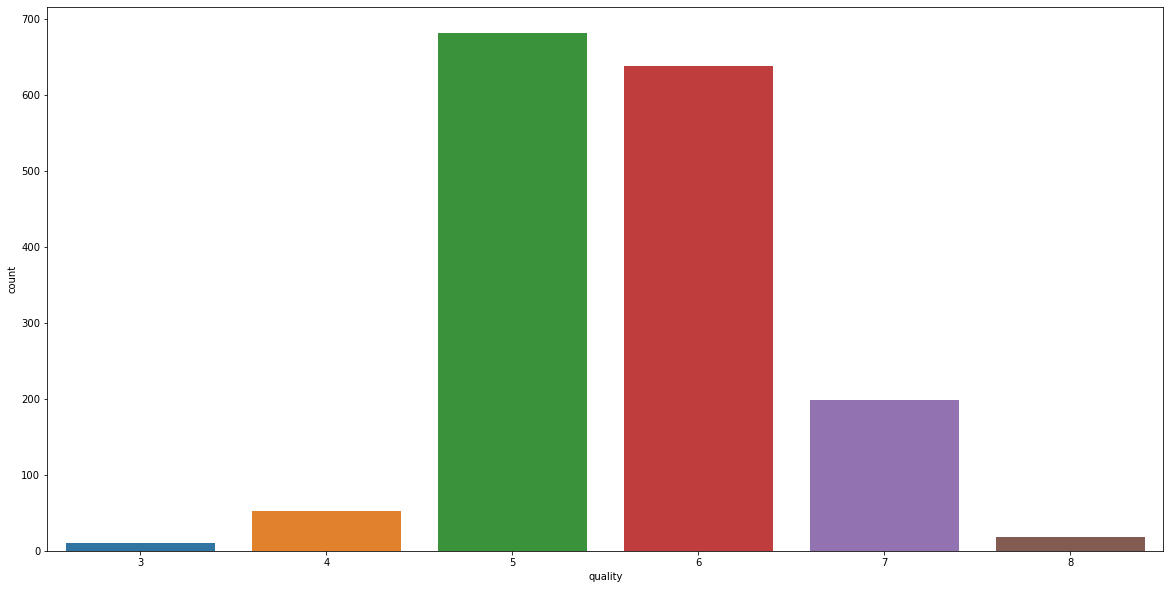

In [58]:
# Our label Distribution (countplot)

ax = sns.countplot(x="quality", data=df)

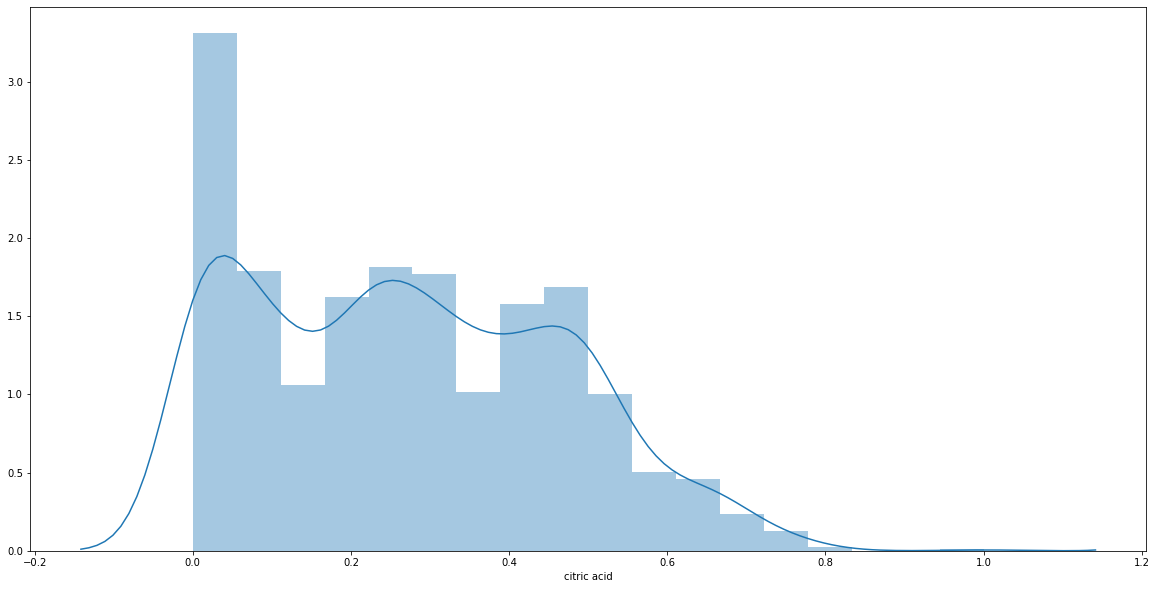

In [59]:
# Example EDA (distplot)
sns.distplot(df["citric acid"])

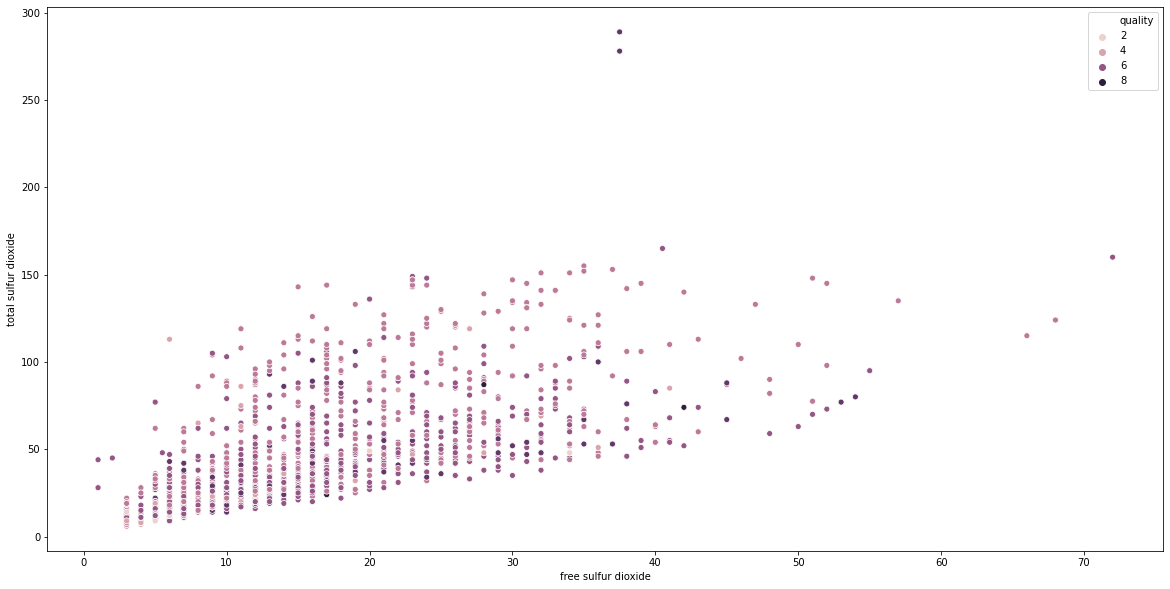

In [60]:
sns.scatterplot(x="free sulfur dioxide", y="total sulfur dioxide", hue="quality", data=df)

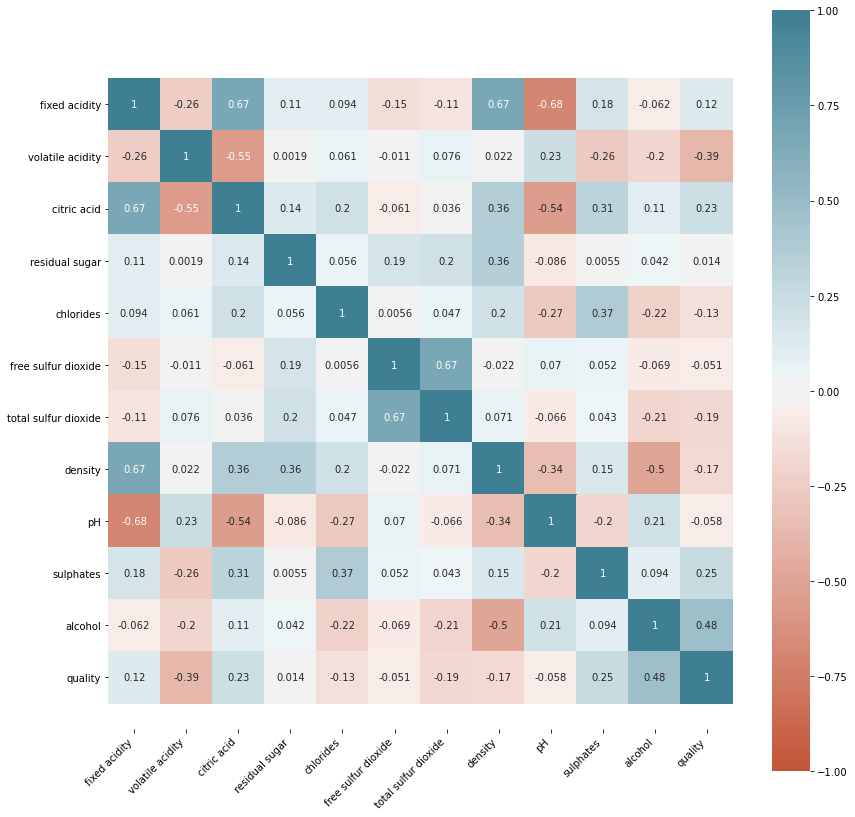

In [61]:
corr = df.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);

# Preprocessing

- Are there any duplicated values?
- Do we need to do feature scaling?
- Do we need to generate new features?
- Split Train and Test dataset. (0.7/0.3)

In [62]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score


In [63]:
df.duplicated()

0       False
1       False
2       False
3       False
4        True
        ...  
1594    False
1595    False
1596     True
1597    False
1598    False
Length: 1599, dtype: bool

In [64]:
df.drop_duplicates()
# there were 240 duplicated values

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [65]:
label_encoder = LabelEncoder()
df["Label"] = label_encoder.fit_transform(df["quality"]) 
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,2


In [66]:
df["Label"].value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: Label, dtype: int64

In [67]:
categories = list(label_encoder.inverse_transform([0, 1, 2, 3, 4, 5]))
categories

[3, 4, 5, 6, 7, 8]

In [68]:
clases = list(set(df.quality))
df.drop(["quality"], axis=1, inplace=True)

In [69]:
df.drop(["free sulfur dioxide"], axis=1, inplace=True)#drop corelated values

In [70]:
df.drop(["total sulfur dioxide"], axis=1, inplace=True)#drop corelated values

In [71]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,Label
0,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,0.9978,3.51,0.56,9.4,2


In [72]:
X, y = df.iloc[: , :-1], df.iloc[: , -1]

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ML Application

- Define models.
- Fit models.
- Evaluate models for both train and test dataset.
- Generate Confusion Matrix and scores of Accuracy, Recall, Precision and F1-Score.
- Analyse occurrence of overfitting and underfitting. If there is any of them, try to overcome it within a different section.

# Decision Tree Model

In [74]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=11 , random_state=42)
clf.fit(X_train,y_train)
print("Accuracy of train:",clf.score(X_train,y_train))
print("Accuracy of test:",clf.score(X_test,y_test))

Accuracy of train: 0.9320822162645219
Accuracy of test: 0.5541666666666667


In [75]:
import os
from sklearn.tree import export_graphviz
# We need to locate graphiz directory for visualization (after conda)
os.environ["PATH"] += ';' + r'C:\Users\Dell\Anaconda3\Library\bin\graphviz'

import graphviz
dot_df = export_graphviz(clf, out_file=None,
                     feature_names=X.columns,
                     class_names=categories,
                     filled=True, rounded=True)
graph = graphviz.Source(dot_df)
graph
# Having trouble in creating a graph for my decision tree.

TypeError: can only concatenate str (not "numpy.int64") to str

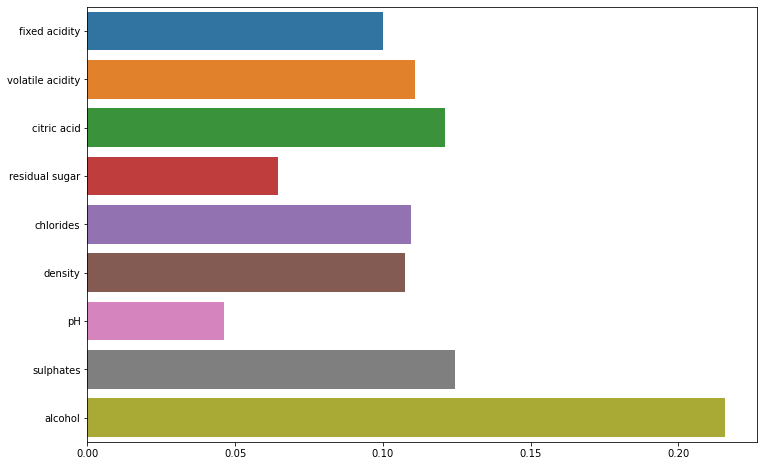

In [76]:
plt.figure(figsize=(12, 8))
importance = clf.feature_importances_
sns.barplot(x=importance, y=X.columns)
plt.show()

In [77]:
importance

array([0.10003111, 0.11079738, 0.12105982, 0.06466054, 0.10965068,
       0.10753245, 0.04610505, 0.12429679, 0.21586617])

In [78]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, classification_report, f1_score
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        17
           2       0.65      0.63      0.64       195
           3       0.56      0.57      0.57       200
           4       0.42      0.48      0.45        61
           5       0.00      0.00      0.00         6

    accuracy                           0.55       480
   macro avg       0.27      0.28      0.27       480
weighted avg       0.55      0.55      0.55       480



In [79]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.2712464087449493
Recall = 0.2793418102844332
Accuracy = 0.5541666666666667
F1 Score = 0.2749553378706165


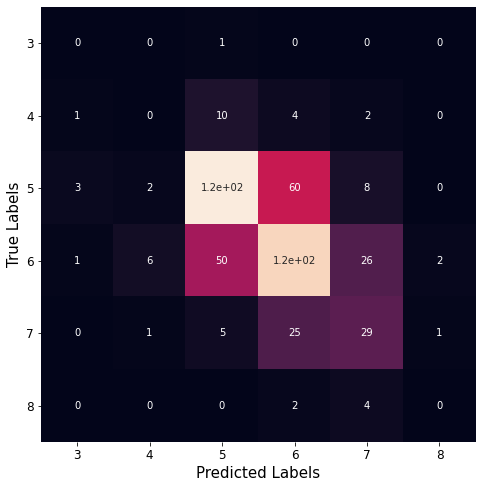

In [80]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Linear Regression Model

In [81]:
from sklearn.datasets import make_regression
def adj_r2 (X,y,model):
    r_squared = model.score(X,y)
    return(1 - (1-r_squared)*(len(y)-1)/(len(y)-X.shape[1]-1))

In [86]:
modelb = LinearRegression(normalize=False)
modelb.fit(X_train,y_train)

print("Score of the train set",modelb.score(X_train,y_train))
print("Score of the test set",modelb.score(X_test,y_test))

Score of the train set 0.3525520059921824
Score of the test set 0.3423954851792358


In [87]:
print("Adj. R2 of the train set",adj_r2(X_train,y_train,modelb))
print("Adj. R2 of the test set",adj_r2(X_test,y_test,modelb))

Adj. R2 of the train set 0.34729769404802513
Adj. R2 of the test set 0.32980305829968914


In [88]:
# Scaling
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
z

array([[0.52835961, 0.96187667, 1.39147228, ..., 0.57920652, 0.96024611,
        0.78782264],
       [0.29854743, 1.96744245, 1.39147228, ..., 0.1289504 , 0.58477711,
        0.78782264],
       [0.29854743, 1.29706527, 1.18607043, ..., 0.04808883, 0.58477711,
        0.78782264],
       ...,
       [1.1603431 , 0.09955388, 0.72391627, ..., 0.54204194, 0.54162988,
        0.45084835],
       [1.39015528, 0.65462046, 0.77526673, ..., 0.30598963, 0.20930812,
        0.78782264],
       [1.33270223, 1.21684919, 1.02199944, ..., 0.01092425, 0.54162988,
        0.45084835]])

In [89]:
len(np.where(z > 3)[0])

155

In [90]:
outliers = list(set(np.where(z > 3)[0]))
new_df = df.drop(outliers,axis = 0).reset_index(drop = False)
display(new_df)

y_new = y[list(new_df["index"])]
len(y_new)

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,Label
0,0,7.4,0.700,0.00,1.9,0.076,0.99780,3.51,0.56,9.4,2
1,1,7.8,0.880,0.00,2.6,0.098,0.99680,3.20,0.68,9.8,2
2,2,7.8,0.760,0.04,2.3,0.092,0.99700,3.26,0.65,9.8,2
3,3,11.2,0.280,0.56,1.9,0.075,0.99800,3.16,0.58,9.8,3
4,4,7.4,0.700,0.00,1.9,0.076,0.99780,3.51,0.56,9.4,2
...,...,...,...,...,...,...,...,...,...,...,...
1469,1594,6.2,0.600,0.08,2.0,0.090,0.99490,3.45,0.58,10.5,2
1470,1595,5.9,0.550,0.10,2.2,0.062,0.99512,3.52,0.76,11.2,3
1471,1596,6.3,0.510,0.13,2.3,0.076,0.99574,3.42,0.75,11.0,3
1472,1597,5.9,0.645,0.12,2.0,0.075,0.99547,3.57,0.71,10.2,2


1474

In [91]:
X_new = new_df.drop('index', axis = 1)
X_scaled = StandardScaler().fit_transform(X_new)
X_scaled

array([[-0.55075274,  1.04031282, -1.39126223, ..., -0.6355168 ,
        -0.99659619, -0.84115424],
       [-0.30733159,  2.10246355, -1.39126223, ...,  0.28211758,
        -0.6051545 , -0.84115424],
       [-0.30733159,  1.39436307, -1.18131951, ...,  0.05270898,
        -0.6051545 , -0.84115424],
       ...,
       [-1.22016091, -0.08084628, -0.70894838, ...,  0.8174043 ,
         0.56917055,  0.44101882],
       [-1.46358206,  0.71576677, -0.76143406, ...,  0.51152617,
        -0.21371282, -0.84115424],
       [-1.40272677, -1.26101375,  1.07556478, ...,  0.12917852,
         0.56917055,  0.44101882]])

In [92]:
# Outliers removed & scaling
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y_new, test_size=0.3, random_state=42)
modelb = LinearRegression(normalize=False)
modelb.fit(X_train,y_train)
print("Score of the train set",modelb.score(X_train,y_train))
print("Score of the test set",modelb.score(X_test,y_test))

Score of the train set 1.0
Score of the test set 1.0


In [93]:
# With outliers & not scaled
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
modelb = LinearRegression(normalize=False)
modelb.fit(X_train,y_train)
print("Score of the train set",modelb.score(X_train,y_train))
print("Score of the test set",modelb.score(X_test,y_test))

Score of the train set 0.3525520059921824
Score of the test set 0.3423954851792358


In [94]:
# With outlier but scaling
X_alls = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_alls,y, test_size=0.3, random_state=42)

modelb = LinearRegression(normalize=False)
modelb.fit(X_train,y_train)
print("Score of the train set",modelb.score(X_train,y_train))
print("Score of the test set",modelb.score(X_test,y_test))

Score of the train set 0.3525520059921825
Score of the test set 0.3423954851792367


In [95]:
pred = clf.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.05      0.94      0.09        17
           2       0.31      0.18      0.23       195
           3       0.49      0.10      0.17       200
           4       0.00      0.00      0.00        61
           5       0.00      0.00      0.00         6

    accuracy                           0.15       480
   macro avg       0.14      0.20      0.08       480
weighted avg       0.33      0.15      0.17       480



C:\Users\pseagada\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
print("Precision = {}".format(precision_score(y_test, pred, average='macro')))
print("Recall = {}".format(recall_score(y_test, pred, average='macro')))
print("Accuracy = {}".format(accuracy_score(y_test, pred)))
print("F1 Score = {}".format(f1_score(y_test, pred,average='macro')))

Precision = 0.14086443778914617
Recall = 0.20429864253393668
Accuracy = 0.15
F1 Score = 0.0818566024566098


C:\Users\pseagada\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


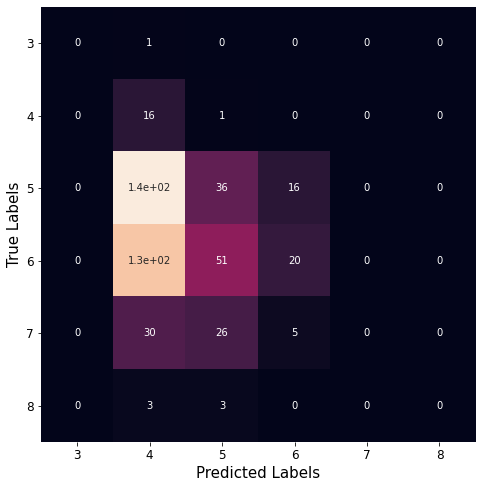

In [97]:
cm = confusion_matrix(y_test, pred)
plt.figure(figsize=(12, 8))
ax =sns.heatmap(cm, square=True, annot=True, cbar=False)
ax.xaxis.set_ticklabels(categories, fontsize = 12)
ax.yaxis.set_ticklabels(categories, fontsize = 12, rotation=0)
ax.set_xlabel('Predicted Labels',fontsize = 15)
ax.set_ylabel('True Labels',fontsize = 15)
plt.show()

# Evaluation



The best performing model was the Linear regression model as it showed the classification between high quality wine and low quality wine. 